In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot
from sklearn.metrics import accuracy_score,f1_score,classification_report,precision_score,recall_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

diamonds=pd.read_csv('diamonds.csv')

# Putting target variable 'price' to the end of the dataset

temp=diamonds.price
diamonds.drop(['price'],axis=1,inplace=True)
diamonds['price']=temp

diamonds.drop(columns = 'Unnamed: 0', axis = 1, inplace = True )
diamonds.head()

#Dropping diamonds that don't have any dimensions

diamonds.drop(diamonds[diamonds['x']==0].index,inplace=True)
diamonds.drop(diamonds[diamonds['z']==0].index,inplace=True)
diamonds.drop(diamonds[diamonds['y']==0].index,inplace=True)

In [3]:
le=LabelEncoder()
df=diamonds.copy()
df[['cut','color','clarity']]=df[['cut','color','clarity']].apply(le.fit_transform)
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,326
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,326
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,327
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,334
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50,2757
53936,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61,2757
53937,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56,2757
53938,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74,2757


In [4]:
# Putting target variable 'price' to the end of the dataset

temp=df.price
df.drop(['price'],axis=1,inplace=True)
df['price']=temp
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,326
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,326
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,327
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,334
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,335


In [5]:
# Binning done by equal data points range

df['price']=pd.qcut(diamonds.price,q=10,labels=[m for m in range(10)])
df.sort_values(by=['price'])

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,0
12373,0.40,2,2,3,62.8,55.0,4.70,4.73,2.96,0
12372,0.40,2,2,3,62.0,57.0,4.70,4.72,2.92,0
12371,0.40,2,2,3,62.5,53.0,4.71,4.76,2.96,0
12370,0.26,2,1,7,60.7,56.0,4.13,4.17,2.52,0
...,...,...,...,...,...,...,...,...,...,...
23753,1.27,3,2,7,61.3,60.0,6.90,6.99,4.26,9
23752,1.60,3,4,5,62.1,60.0,7.51,7.44,4.64,9
23751,1.77,4,3,2,63.1,57.0,7.68,7.63,4.83,9
23759,1.71,2,1,3,61.9,57.0,7.69,7.65,4.75,9


In [6]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

train_X,test_X,train_Y,test_Y=train_test_split(X,Y,random_state=190,test_size=0.2,shuffle=True)

def show_confusion_matrix(model):
    print('Accuracy: %.2f%%' % (accuracy_score(test_Y, predi) * 100))
    print('Precision: %.2f%%' % (precision_score(test_Y, predi, average='macro') * 100))
    print('Recall: %.2f%%' % (recall_score(test_Y, predi, average='macro') * 100))
    print('F1_Score: %.2f%%' % (f1_score(test_Y, predi, average='macro') * 100))
    confusion_matrix_model = confusion_matrix(test_Y, predi)
    plt.figure(figsize=(12, 8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax=ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {model}')

In [7]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(train_X,train_Y)
predi=knn.predict(test_X)
accuracy_score(predi,test_Y)

0.6344584569732937

Accuracy: 63.45%
Precision: 63.56%
Recall: 63.41%
F1_Score: 63.45%


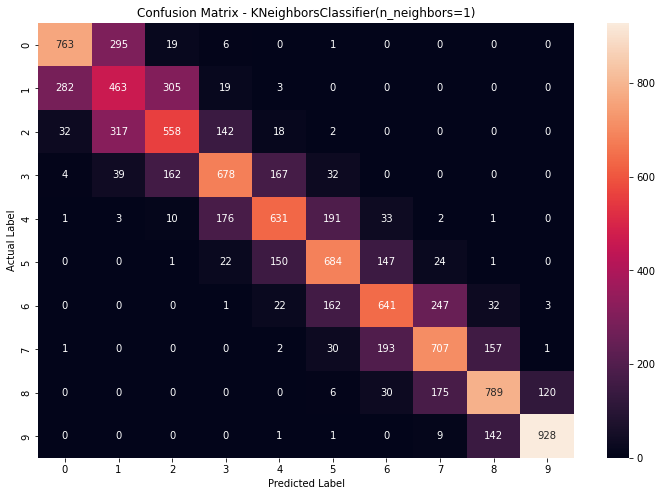

In [8]:
show_confusion_matrix(knn)

In [9]:
gnb=GaussianNB()
gnb.fit(train_X,train_Y)
predi=gnb.predict(test_X)
accuracy_score(predi,test_Y)

0.5104784866468842

Accuracy: 51.05%
Precision: 50.41%
Recall: 51.06%
F1_Score: 48.97%


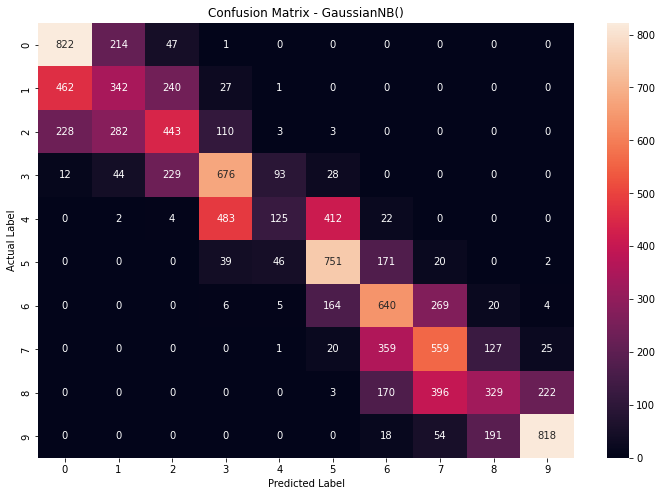

In [10]:
show_confusion_matrix(gnb)

In [11]:
dt=DecisionTreeClassifier()
dt.fit(train_X,train_Y)
predi=dt.predict(test_X)
accuracy_score(predi,test_Y)

0.7734606824925816

Accuracy: 77.35%
Precision: 77.36%
Recall: 77.35%
F1_Score: 77.35%


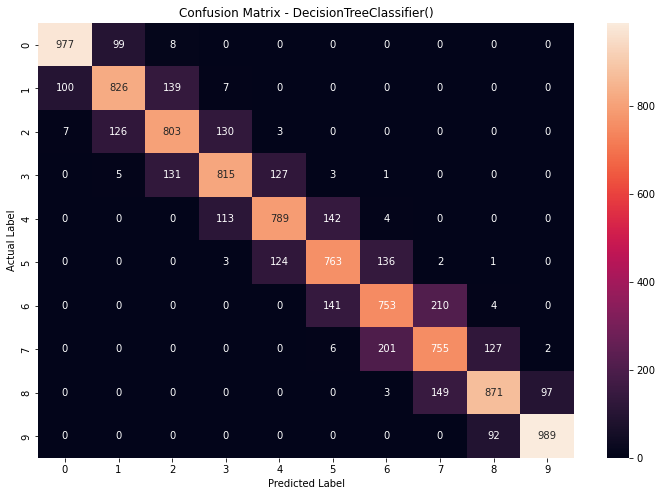

In [12]:
show_confusion_matrix(dt)

In [13]:
xgboost=XGBClassifier()
xgboost.fit(train_X,train_Y)
predi=xgboost.predict(test_X)
accuracy_score(predi,test_Y)

0.8376298219584569

Accuracy: 83.76%
Precision: 83.79%
Recall: 83.78%
F1_Score: 83.77%


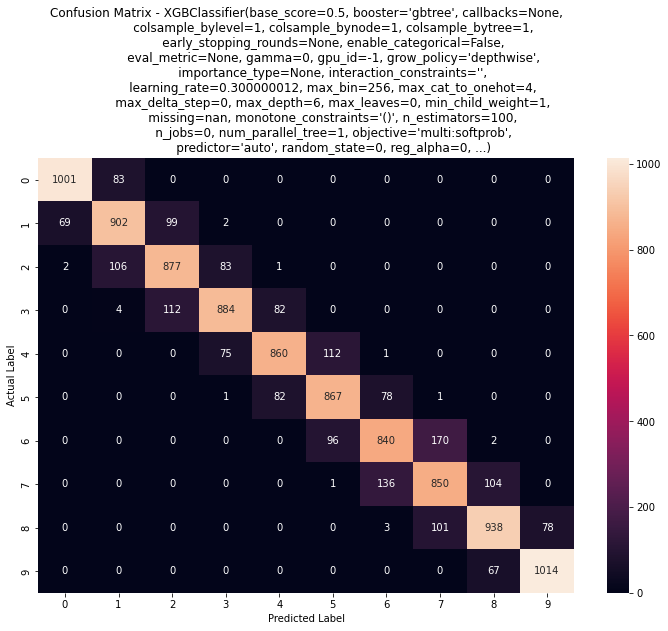

In [14]:
show_confusion_matrix(xgboost)

In [15]:
randomforest=RandomForestClassifier()
randomforest.fit(train_X,train_Y)
predi=randomforest.predict(test_X)
accuracy_score(predi,test_Y)

0.829933234421365

Accuracy: 82.99%
Precision: 82.98%
Recall: 83.00%
F1_Score: 82.98%


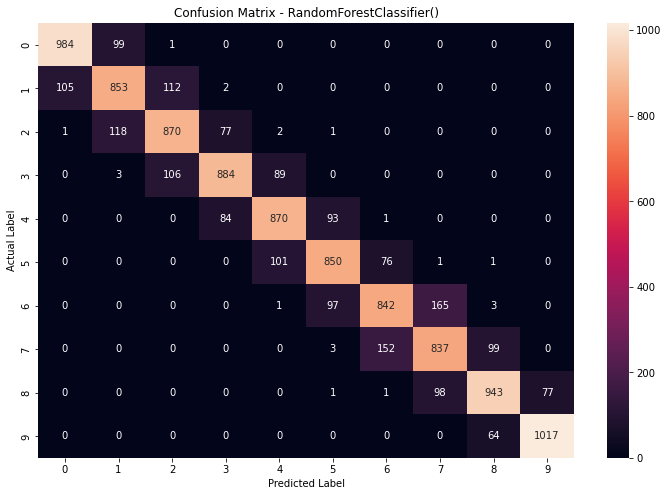

In [16]:
show_confusion_matrix(randomforest)

In [17]:
gradientboosting=GradientBoostingClassifier()
gradientboosting.fit(train_X,train_Y)
predi=gradientboosting.predict(test_X)
accuracy_score(predi,test_Y)

0.7716988130563798

Accuracy: 77.17%
Precision: 77.20%
Recall: 77.17%
F1_Score: 77.14%


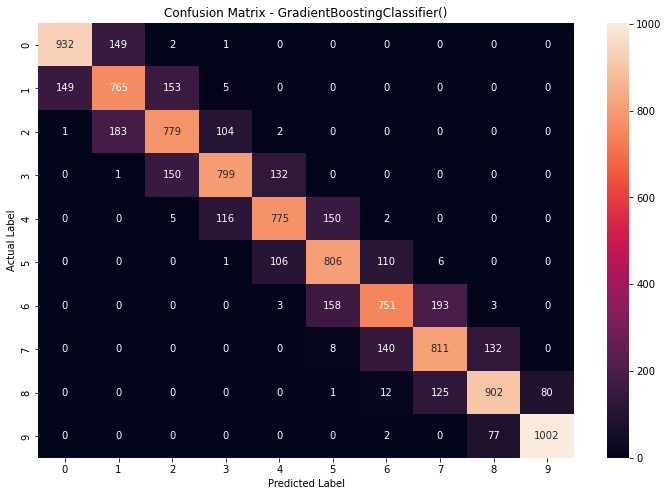

In [18]:
show_confusion_matrix(gradientboosting)

In [19]:
adaboost=AdaBoostClassifier()
adaboost.fit(train_X,train_Y)
predi=adaboost.predict(test_X)
accuracy_score(predi,test_Y)

0.30118694362017806

Accuracy: 30.12%
Precision: 17.70%
Recall: 29.96%
F1_Score: 14.66%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


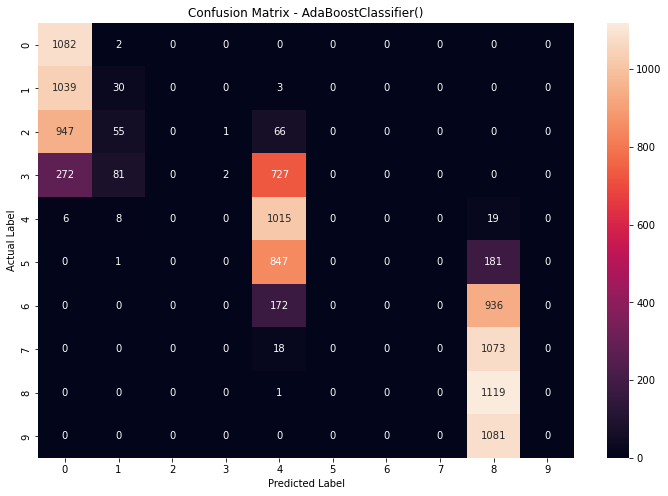

In [20]:
show_confusion_matrix(adaboost)